<a href="https://colab.research.google.com/github/Zhuzaif/Image/blob/main/Copy_of_Bulk_Image_Upscaler1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Install CodeFormer and Download Model { display-mode: "form" }
from IPython.display import clear_output
%cd /content
!rm -rf /content/CodeFormer
!git clone https://github.com/sczhou/CodeFormer.git
%cd /content/CodeFormer
!pip install -r /content/CodeFormer/requirements.txt
# Install basicsr
!python /content/CodeFormer/basicsr/setup.py develop
# Download the pre-trained model
!python /content/CodeFormer/scripts/download_pretrained_models.py facelib
!python /content/CodeFormer/scripts/download_pretrained_models.py CodeFormer
clear_output()

In [2]:
#@title Utils { display-mode: "form" }


# Visualization function
import cv2
import matplotlib.pyplot as plt
import os
import shutil
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('CodeFormer', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

upload_folder = '/content/CodeFormer/inputs/user_upload'
if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)
if os.path.exists("/content/CodeFormer/results/user_upload_0.7"):
  shutil.rmtree("/content/CodeFormer/results/user_upload_0.7")
clear_output()

In [3]:
#@title Upload single image or bulk images  { display-mode: "form" }

from PIL import Image
import os
import shutil
# from google.colab import drive # Removed Google Drive import
import os
from google.colab import files
keep_images = False #@param {type:"boolean"}
upload_folder = '/content/CodeFormer/inputs/user_upload'
%cd /content/CodeFormer

if keep_images:
  pass
else:
  if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
  os.mkdir(upload_folder)


# Removed image_from_drive function

def image_from_device():
  uploaded = files.upload()
  for filename in uploaded.keys():
    dst_path = os.path.join(upload_folder, filename)
    print(f'move {filename} to {dst_path}')
    shutil.move(filename, dst_path)

upload_from = "local device" #@param ["local device"] {allow-input: true} # Removed Google Drive option
# if upload_from == "google drive": # Removed Google Drive option
#   image_from_drive() # Removed Google Drive option
if upload_from == "local device":
  image_from_device()
clear_output()
file_count = len(os.listdir(upload_folder))
if file_count >= 1:
    print("Run next cell")
else:
    print("Please upload an image.")

Run next cell


In [4]:
#@title processing { display-mode: "form" }

# Inference the uploaded images

#@markdown `CODEFORMER_FIDELITY`: Balance the quality (lower number) and fidelity (higher number)<br>
CODEFORMER_FIDELITY = 0.7 #@param {type:"slider", min:0, max:1, step:0.01}
#@markdown `BACKGROUND_ENHANCE`: Enhance background image with Real-ESRGAN<br>
BACKGROUND_ENHANCE = True #@param {type:"boolean"}
#@markdown `FACE_UPSAMPLE`: Upsample restored faces for high-resolution AI-created images<br>
FACE_UPSAMPLE = True #@param {type:"boolean"}
#@markdown `UPSAMPLER`: Choose the upscaling factor for Real-ESRGAN<br>
UPSAMPLER = "4" #@param ["2", "4", "6"]

upscale_command = ""
if BACKGROUND_ENHANCE:
  if FACE_UPSAMPLE:
    upscale_command = "--bg_upsampler realesrgan --face_upsample"
  else:
    upscale_command = "--bg_upsampler realesrgan"
else:
  if FACE_UPSAMPLE:
    upscale_command = "--face_upsample"

# Construct the full command
full_command = f"python inference_codeformer.py -w {CODEFORMER_FIDELITY} --input_path inputs/user_upload {upscale_command}"

# Add the upscaling factor if upsampling is enabled
if BACKGROUND_ENHANCE or FACE_UPSAMPLE:
  full_command += f" --upscale {UPSAMPLER}"

print(f"Executing command: {full_command}") # Print the command being executed

# Execute the command
%cd /content/CodeFormer
!{full_command}

clear_output()
output_folder = f"/content/CodeFormer/results/user_upload_{CODEFORMER_FIDELITY}"
if os.path.exists(output_folder) and len(os.listdir(output_folder)) > 0:
  print(f"All results are saved in {output_folder}")
else:
  print(f"No results found in {output_folder}. There might have been an issue with the processing.")

All results are saved in /content/CodeFormer/results/user_upload_0.7


it's your choice

 1. ```"zip"``` if you upload many images

 2. ```"single file"``` if you upload 1-2 images


In [5]:
#@title download images { display-mode: "form" }
# save_a_copy_in_google_drive = False # Removed Google Drive option
# if save_a_copy_in_google_drive: # Removed Google Drive option
#   drive.mount('/content/gdrive',force_remount=True) # Removed Google Drive option
#   drive_save_path = '/content/gdrive/MyDrive/CodeFormer_Bulk_Upscale' # Removed Google Drive option
#   if os.path.exists(drive_save_path): # Removed Google Drive option
#     pass # Removed Google Drive option
#   else: # Removed Google Drive option
#     os.mkdir(drive_save_path) # Removed Google Drive option
#   clear_output() # Removed Google Drive option
#   print(f"All images/zip file save at : {drive_save_path}") # Removed Google Drive option

import os
import uuid
from google.colab import files
import shutil
def download_single_images():
  global CODEFORMER_FIDELITY
  download_folder = '/content/download'
  if os.path.exists(download_folder):
      os.system(f'rm -rf {download_folder}')
  os.makedirs(download_folder)
  folder_path = f"/content/CodeFormer/results/user_upload_{CODEFORMER_FIDELITY}/final_results" # Look inside final_results
  for filename in os.listdir(folder_path):
      original_path = os.path.join(folder_path, filename)
      name, extension = os.path.splitext(filename)
      random_string = str(uuid.uuid4())[:8]
      new_filename = f"{name}_{random_string}{extension}"
      download_path = f"/content/download/{new_filename}"
      # if save_a_copy_in_google_drive: # Removed Google Drive option
      #   drive_path=f"{drive_save_path}/{new_filename}" # Removed Google Drive option
      #   shutil.copy(original_path, drive_path) # Removed Google Drive option
      shutil.copy(original_path, download_path)

      files.download(download_path)
def download_zip():
  global CODEFORMER_FIDELITY
  random_string = str(uuid.uuid4())[:5]
  zip_file_name=f"results_{random_string}.zip"
  var1=os.system(f'zip -r {zip_file_name} results/user_upload_{CODEFORMER_FIDELITY}/final_results') # Zip the final_results folder
  # if save_a_copy_in_google_drive: # Removed Google Drive option
  #   sour=f"/content/CodeFormer/{zip_file_name}" # Removed Google Drive option
  #   dest=f"{drive_save_path}/{zip_file_name}" # Removed Google Drive option
  #   shutil.copy(sour, dest) # Removed Google Drive option

  files.download(zip_file_name)



folder_path = f"/content/CodeFormer/results/user_upload_{CODEFORMER_FIDELITY}/final_results" # Check inside final_results
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  # Add more extensions if needed
print(f"Checking folder: {folder_path}")
print(f"Expected image extensions: {image_extensions}")
if os.path.exists(folder_path):
  print(f"Files found in folder: {os.listdir(folder_path)}")
  contains_image = False
  for filename in os.listdir(folder_path):
      _, extension = os.path.splitext(filename)
      if extension.lower() in image_extensions:
          contains_image = True
          break
  download_format = "single file" #@param ["single file", "zip"] {allow-input: true}
  if contains_image:
    if download_format == "single file":
      download_single_images()
    if download_format == "zip":
      download_zip()
  else:
    print(f"The folder '{folder_path}' does not contain any image files with the expected extensions.")
else:
  print(f"The folder '{folder_path}' does not exist.")

Checking folder: /content/CodeFormer/results/user_upload_0.7/final_results
Expected image extensions: ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
Files found in folder: ['eye-of-model-with-colorful-art-m.png']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

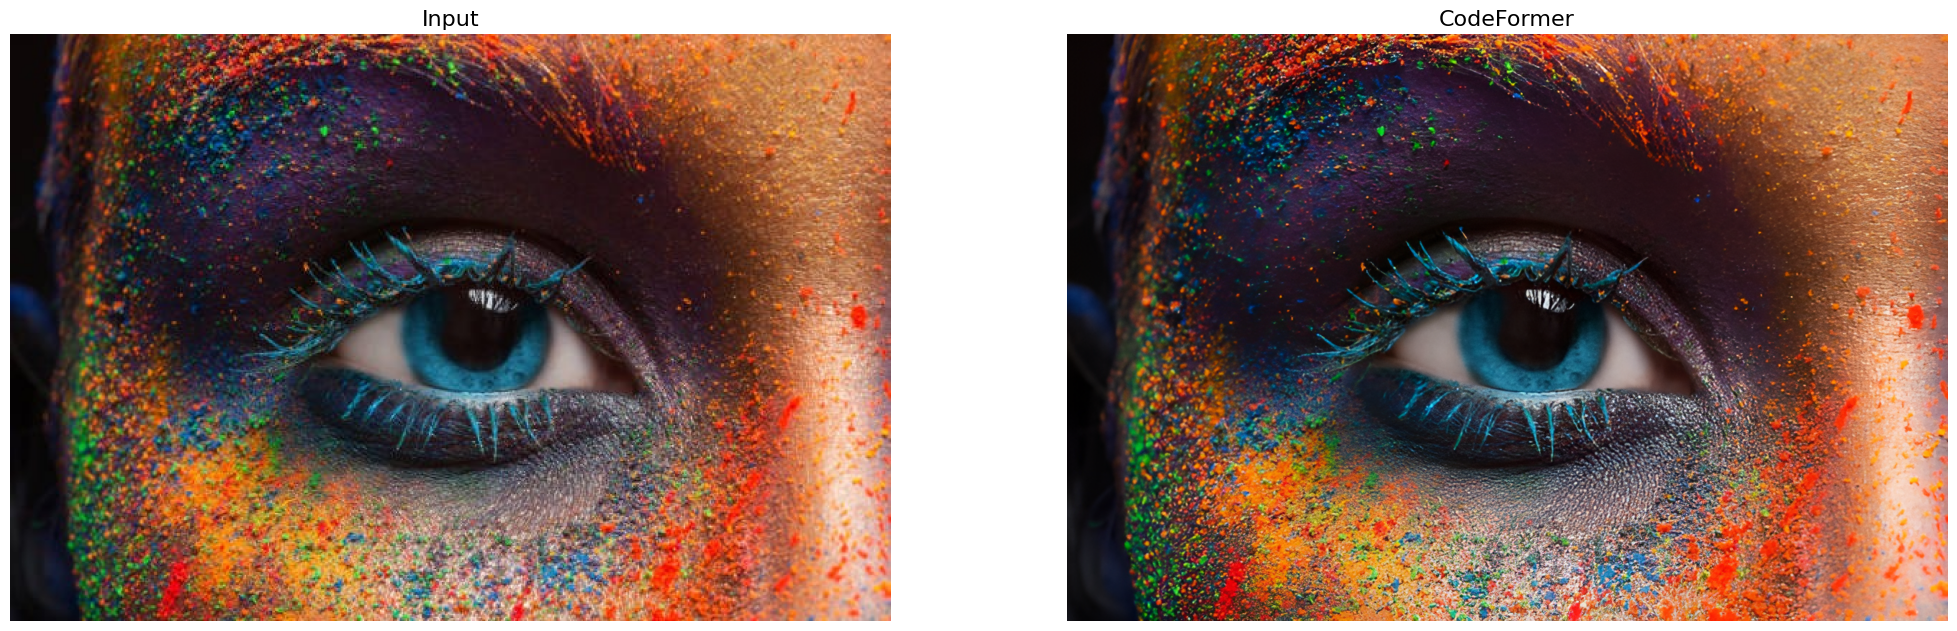

In [6]:
import os
import matplotlib.pyplot as plt
import cv2

# Assuming only one image is uploaded and processed
input_image_path = os.path.join(upload_folder, os.listdir(upload_folder)[0])
output_image_path = os.path.join(output_folder, "final_results", os.listdir(os.path.join(output_folder, "final_results"))[0])

# Load the images
input_img = imread(input_image_path)
output_img = imread(output_image_path)

# Display the images side by side
display(input_img, output_img)